# マルコフ連鎖，天気の例

Wiki マルコフ連鎖：https://ja.wikipedia.org/wiki/マルコフ連鎖

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### 天気の遷移データ
晴れ：0, 曇り：1，雨：2

In [ ]:
weather = \
np.array([0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, \
          0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
total=np.size(weather)
print("総日数:", total, " 晴れ=", np.count_nonzero(weather==0), " 曇り=",np.count_nonzero(weather==1)," 雨=",np.count_nonzero(weather==2))

総日数: 30  晴れ= 18  曇り= 8  雨= 4


#### 遷移行列（transition matrix）
確率遷移行列とも言われる。遷移を推移と称する場合もある。<br>
$P(0,0)$，すなわち$p_{00}$の求め方は，weatherの中で$0 \to 0$となる回数を求め，それと晴れの日との比となる。<br>
他の$P(i,j)$も同様であるが，weatherの最後が曇り（1）であるから，曇りの数$-1=7$が分母となる。<br>
行方向の和は，各場合分け毎の全確率だから1となる。

In [ ]:
P = np.array([[12/18, 5/18, 1/18],
               [4/7,  2/7,  1/7],
               [1/4,  1/4,  2/4]])
print(np.sum(P, axis=1)) #行方向の確率の総和

[1. 1. 1.]


#### シミュレーション

In [ ]:
Num = 30
w0 = w = np.array([0.2, 0.1, 0.7]) #初期値，確率分布ベクトル，総和＝１とする
wTrack = np.zeros((3,Num))
wTrack[:,0] = w0
for k in range(1, Num):
    w = w.dot(P)  # w P の計算
    wTrack[:,k] = w

print(w) #最終値の表示

[0.58064516 0.27598566 0.14336918]


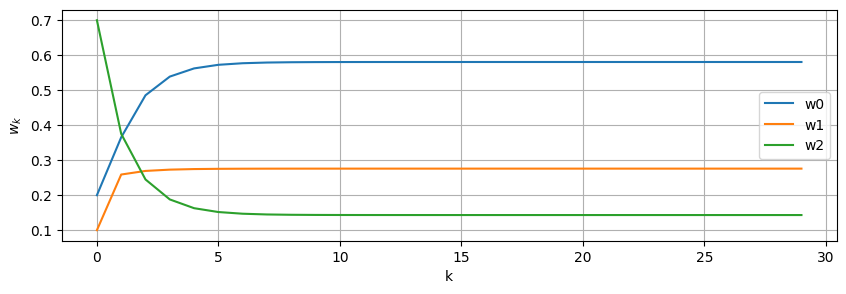

In [ ]:
fig = plt.subplots(figsize=(10,3)) # size [inch,inch]
plt.plot(wTrack[0,:], label="w0")
plt.plot(wTrack[1,:], label="w1")
plt.plot(wTrack[2,:], label="w2")

plt.grid()
plt.xlabel('k')
plt.ylabel('$w_k$')
plt.legend()
#plt.title()

#plt.savefig('fig_SM_MarkovChain01.png', bbox_inches='tight')
plt.show()

In [ ]:
print(w)

[0.58064516 0.27598566 0.14336918]


<function matplotlib.pyplot.show(close=None, block=None)>

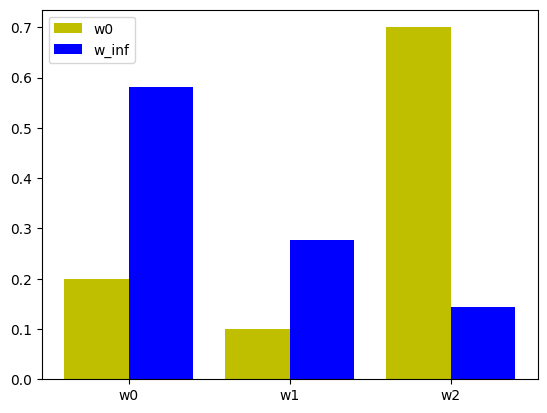

In [ ]:
X = np.arange(len(w))
wid = 0.4
plt.bar(X,     w0, width=wid, color='y', label='w0',    align='center')
plt.bar(X+wid, w , width=wid, color='b', label='w_inf', align='center')
plt.xticks(X+wid/2, ['w0', 'w1', 'w2'])
plt.legend()
#plt.savefig('fig_Stoch_MarkovChain_Distribution.png')
plt.show

## 定常分布と極限分布
https://mathwords.net/teijobunpu <br>
http://dopal.cs.uec.ac.jp/okamotoy/lect/2014/dme/handout12.pdf <br>
極限分布が存在するとき，ある条件を満たすマルコフ連鎖は，極限分布が定常分布に一致するため，定常分布を用いてシステムの評価をすることが多い。https://www.komazawa-u.ac.jp/~toshi/teaching/TIT/note1.pdf

#### 固有値，固有ベクトルを用いた解法

In [ ]:
PP = P.T
eig_val, eig_vec = np.linalg.eig(PP)
print(PP)
print(eig_val)
print(eig_vec)

[[0.66666667 0.57142857 0.25      ]
 [0.27777778 0.28571429 0.25      ]
 [0.05555556 0.14285714 0.5       ]]
[1.         0.01356463 0.43881632]
[[ 0.88151599  0.61577018 -0.68242023]
 [ 0.41899217 -0.77223444 -0.04702561]
 [ 0.21765827  0.15646426  0.72944583]]


In [ ]:
idx = np.argmax(np.abs(np.real(eig_val))) #解が複素数であることに対処する。固有値の最大値は１である。
pi = np.real(eig_vec[:, idx]).T
pi /= np.sum(pi)
pi

array([0.58064516, 0.27598566, 0.14336918])

#### 連立方程式に基づく解法

In [ ]:
A = (P-np.eye(3)).T
np.shape(A)

(3, 3)

In [ ]:
A0 = np.ones((4,4))
for i in range(3):
    for j in range(3):
        A0[i,j] = A[i,j]

A0[3,3]=0
b0 = np.array([0.0, 0.0, 0.0, 1.0])

In [ ]:
A0

array([[-0.33333333,  0.57142857,  0.25      ,  1.        ],
       [ 0.27777778, -0.71428571,  0.25      ,  1.        ],
       [ 0.05555556,  0.14285714, -0.5       ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  0.        ]])

In [ ]:
b0

array([0., 0., 0., 1.])

In [ ]:
sol = np.linalg.solve(A0,b0)
sol

array([5.80645161e-01, 2.75985663e-01, 1.43369176e-01, 4.62592927e-18])

**Exercise**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

[[0.  1.  0.  0.  0.  0. ]
 [0.2 0.  0.8 0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.6 0.  0.4 0. ]
 [0.  0.  0.  0.8 0.  0.2]
 [0.  0.  0.  0.  1.  0. ]]
[0.42741581 0.01469939 0.0399587  0.11774096 0.12591733 0.27426782]
[0.03708074 0.1270963  0.3708074  0.2541926  0.1854037  0.02541926]


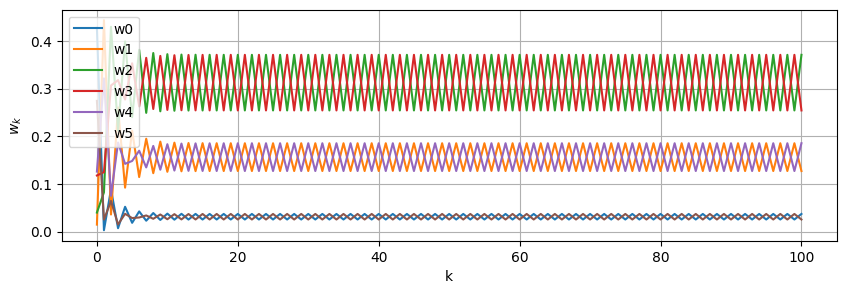

In [2]:
N = 5
repeat = 100
P = np.zeros((N+1,N+1))
for i in range(N+1):
    ### edit here! ###
    # initialize P
    if (i > 0):
        P[i,i-1] = i / N
    if (i < N):
        P[i,i+1] = (N-i) / N
    ##################
print(P)
w0 = w = np.zeros(N+1)
w_list = []
total = 0
for i in range(N+1):
    w_list.append(np.random.rand())
    total += w_list[i]
for i in range(N+1):
    w_list[i] /= total
w0 = w = np.array(w_list)
print(w0)
wTrack = np.zeros((N+1,repeat+1))

wTrack[:,0] = w0
for k in range(1, repeat+1):
    w = w.dot(P)  # w P の計算
    wTrack[:,k] = w

#print(wTrack)
print(w) #最終値の表示

fig = plt.subplots(figsize=(10,3)) # size [inch,inch]
for number in range(N+1):
    plt.plot(wTrack[number,:], label="w"+str(number))

plt.grid()
plt.xlabel('k')
plt.ylabel('$w_k$')
plt.legend()
#plt.title()

#plt.savefig('fig_SM_MarkovChain01.png', bbox_inches='tight')
plt.show()